In [1]:
# Importing the necessary libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

## Section 1

### Exploratory Data Analysis

In [2]:
data = pd.read_csv("Leads.csv")

data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Shape of Dataset

data.shape

(9240, 37)

In [4]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### From the data dict, we can see that the columns "Prospect ID" and "Lead number" are just unique ID's assigned to the users and does not contain much relevance in the analysis. Therefore we can remove these columns from the dataset. 

In [6]:
# Dropping columns

data.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

In [7]:
data.shape

(9240, 35)

#### From the dataset, we can see that some of the values in some columns such as "City" and "Lead Profile" are given as "Select". Since it does not give any meaning to it, we can assume that the users did not choose any option. Therefore, we can replace "Select" with null values.

In [8]:
#Converting 'Select' values to NaN.

data = data.replace('Select', np.nan)

data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
# Null value check

data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [10]:
# Null values (%) check

null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)

null_perc

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [11]:
drop_cols = null_perc[null_perc > 45].index.tolist()

print(drop_cols)

['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


#### The above columns have an abnormal number of missing values. The columnns also do not contribute much to the analysis. Therefore we can drop these columns

In [12]:
# Dropping columns having more than 45% of null values

data.drop(columns=drop_cols, inplace=True)

data.shape

(9240, 28)

In [13]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


### Categorical Variable analysis

#### "Country"

In [14]:
# Checking count of "Country"

data['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

#### In the "Country" column, there are two values which are clashing : "NaN" and "Unknown". So we replace NaN with unknown since both mean the same.

In [15]:
data['Country'].fillna('unknown', inplace=True)

data['Country'].value_counts(dropna=False)

Country
India                   6492
unknown                 2466
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Asia/Pacific Region        2
Italy                      2
Uganda                     2
Bangladesh                 2
Netherlands                2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland                1
Denmar

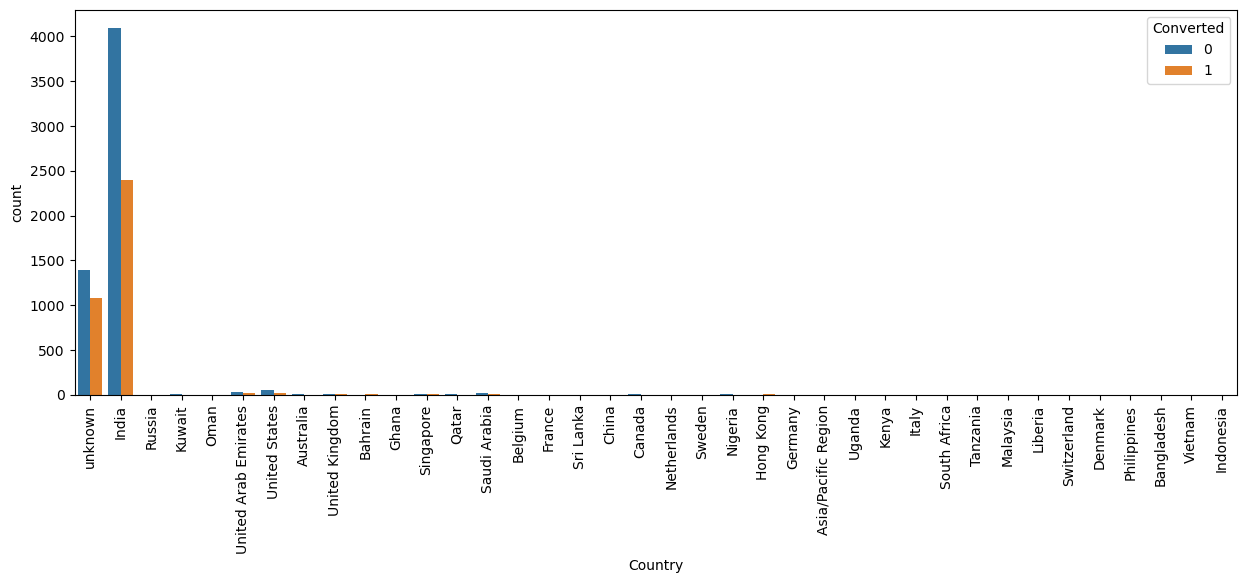

In [16]:
# Converting from int to str for better readability

data['Converted'] = data['Converted'].astype(str)

# Create a count plot with seaborn

plt.figure(figsize=(15, 5))
s1 = sns.countplot(x='Country', hue='Converted', data=data)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)

plt.show()

#### From the graph, we can see that most of the users are from India and the no. of users from other countries are very low when compared to India. Therefore, we can replace the unknown values with INDIA for better analysis

In [17]:
data['Country'] = data['Country'].replace('unknown','India')

data['Country'].value_counts(dropna=False)

Country
India                   8958
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Bangladesh                 2
Asia/Pacific Region        2
Philippines                2
Italy                      2
Uganda                     2
Netherlands                2
China                      2
Belgium                    2
Ghana                      2
Russia                     1
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland                1
Denmar

#### Out of 9240 entries, almost 9000 entries are of India. So we can drop this column to avoid unnecessary analysis.

In [18]:
data.drop(['Country'], axis = 1, inplace = True)

In [19]:
data.shape

(9240, 27)

#### "City"

In [20]:
# Checking count of City

data['City'].value_counts(dropna=False)

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

#### Similar to the Country column, since the count of Mumbai is highest, we replace the NaN values with Mumbai

In [21]:
data['City'] = data['City'].replace(np.nan,'Mumbai')

data['City'].value_counts(dropna=False)

City
Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

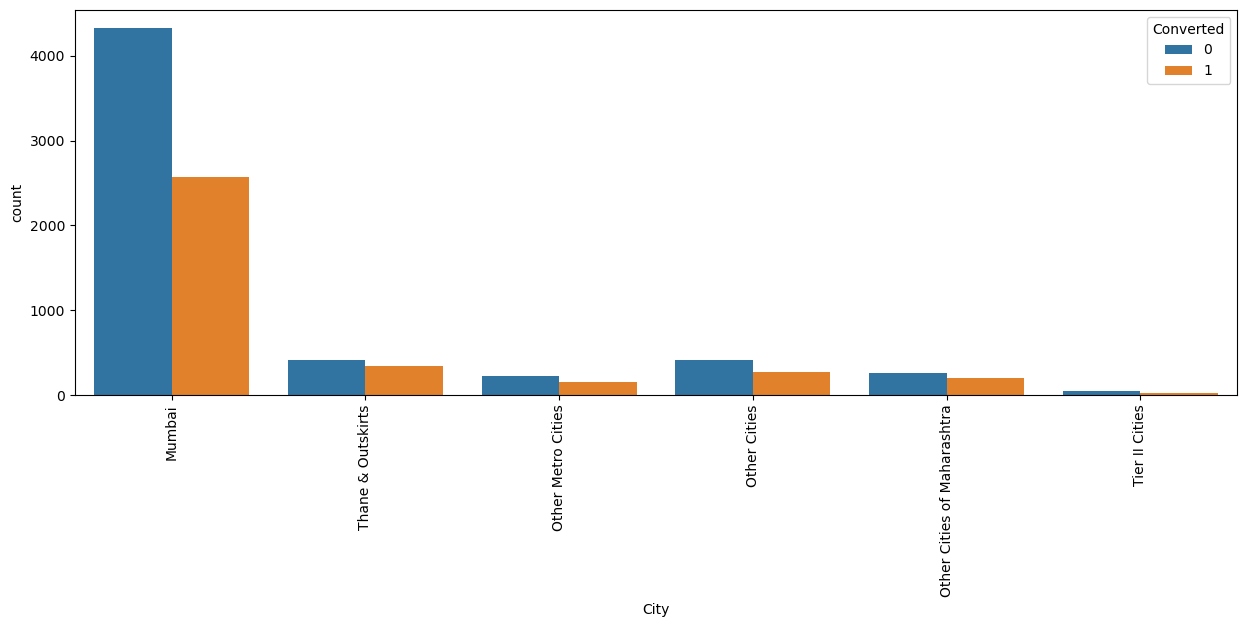

In [22]:
# Visualization

plt.figure(figsize=(15, 5))
s2 = sns.countplot(x='City', hue='Converted', data=data)
s2.set_xticklabels(s2.get_xticklabels(), rotation=90)

plt.show()

#### We will not be dropping the 'City' column because the other columns have also a considerable amount of numbers

#### "Specialization"

In [23]:
data['Specialization'].value_counts(dropna=False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

#### Two issues needs to be addressed:
- Converting Nan to Not_Specified because unlike City or Country, users can choose to fill the specialization column as 'not specified'/'not yet decided'.

- Combining all management into a single variable for better analysis. Since all come under management, representing them as a single variable will be easy to understand.

In [24]:
# Converting Nan to Not Specified

data['Specialization'] = data['Specialization'].replace(np.nan, 'Not Specified')

In [25]:
data['Specialization'] = data['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specialization') 

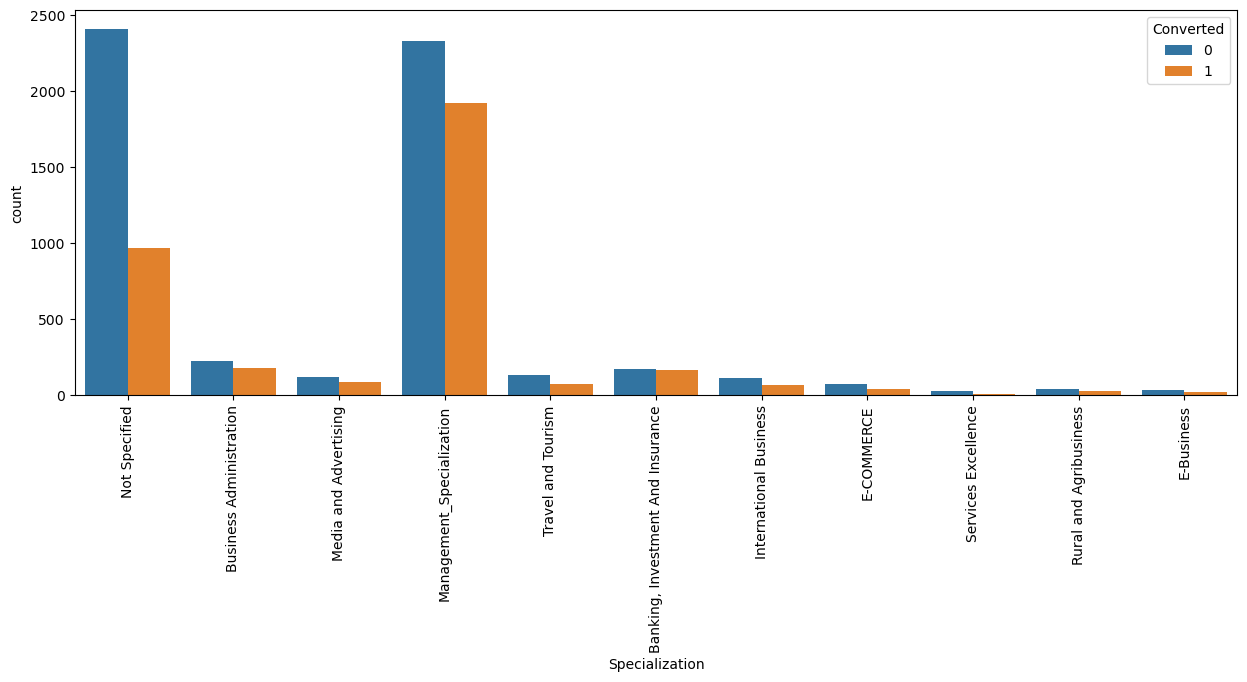

In [26]:
# Visualization

plt.figure(figsize=(15, 5))
s3 = sns.countplot(x='Specialization', hue='Converted', data=data)
s3.set_xticklabels(s3.get_xticklabels(), rotation=90)

plt.show()

#### "What is your occupation"

In [27]:
data['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

#### We can replace NaN with Unemployed

In [28]:
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')

data['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

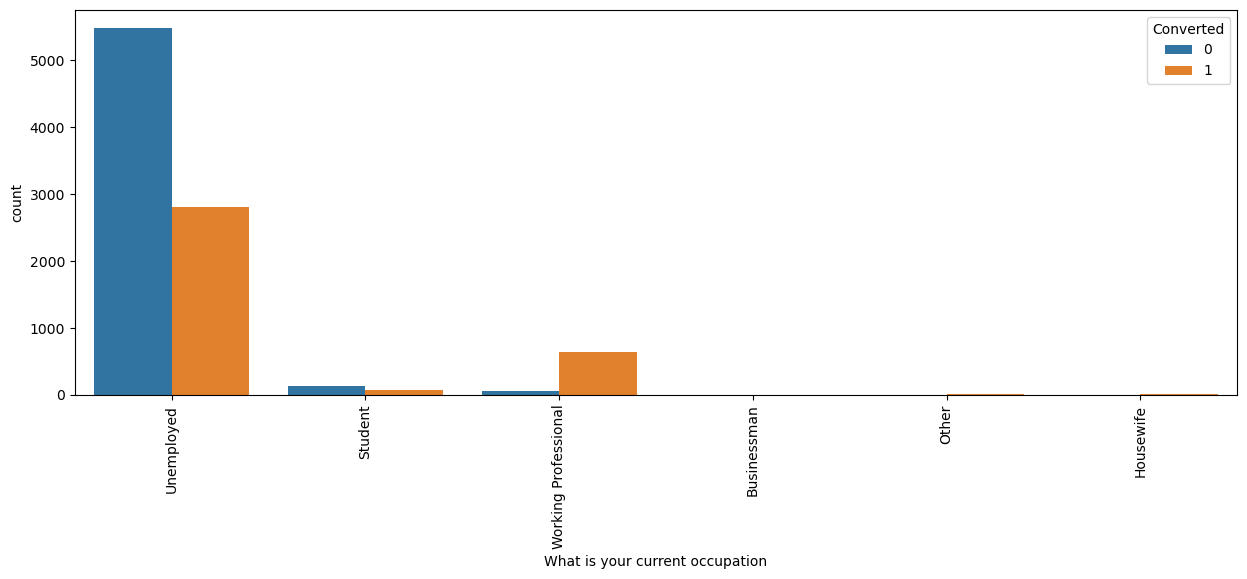

In [29]:
# Visualization

plt.figure(figsize=(15, 5))
s4 = sns.countplot(x='What is your current occupation', hue='Converted', data=data)
s4.set_xticklabels(s4.get_xticklabels(), rotation=90)

plt.show()

#### From the graph, we can see that most of the working professional are interested were converted; whereas most of the people who are unemployed are not interesed and did not wish to enroll in the course. We can also see that most of the leads were from the unemployed section.

#### "What matters most to you in choosing a course"

In [30]:
data['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

#### Since the Better Career value is the highest, we can replace NaN with the same

In [31]:
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

data['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

#### From the above count, we can see that most of the users have chosen the "Better Career Option". Therefore we can drop the column since it will not provide us with useful insights.

In [32]:
data.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

data.shape

(9240, 26)

#### "Tags"

In [33]:
data['Tags'].value_counts(dropna=False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

#### From the above values, we can see that there are a number of tags having a very low count. So we can replace these tags with a common tag. We can also replace Nan with Not Specified.

In [34]:
data['Tags'] = data['Tags'].replace(np.nan,'Not Specified')

data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized', 'Already a student', 'Not doing further education',
                                    'invalid number', 'wrong number given', 'Interested  in full time MBA'], 'Other_Tags')


In [35]:
data['Tags'].value_counts(dropna=False)

Tags
Not Specified                          3353
Will revert after reading the email    2072
Ringing                                1203
Other_Tags                             1140
Interested in other courses             513
Closed by Horizzon                      358
switched off                            240
Busy                                    186
Lost to EINS                            175
Name: count, dtype: int64

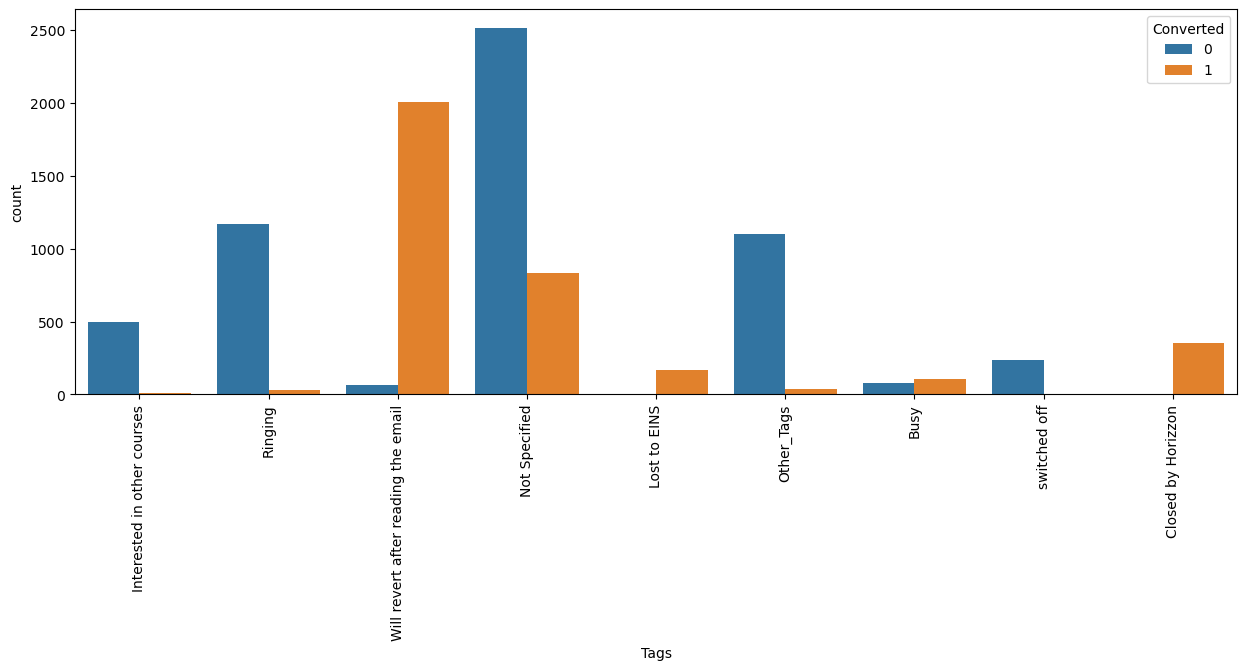

In [36]:
# Visualization

plt.figure(figsize=(15, 5))
s5 = sns.countplot(x='Tags', hue='Converted', data=data)
s5.set_xticklabels(s5.get_xticklabels(), rotation=90)

plt.show()

#### From the graph, we can see that the users are mosst likely to enroll after readng the mail.

#### "Lead Source"

In [37]:
data['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

#### We can see from the list that there are duplicate values(Google). Since Facebook is also a part of Social Media, we can replace Facebook with Social media. We can also group the lower frequency values under a single name.

In [38]:
data['Lead Source'] = data['Lead Source'].replace('google','Google')

data['Lead Source'] = data['Lead Source'].replace('Facebook','Social Media')

data['Lead Source'] = data['Lead Source'].replace(np.nan,'Others')

data['Lead Source'] = data['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')

data['Lead Source'].value_counts(dropna=False)

Lead Source
Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                57
Name: count, dtype: int64

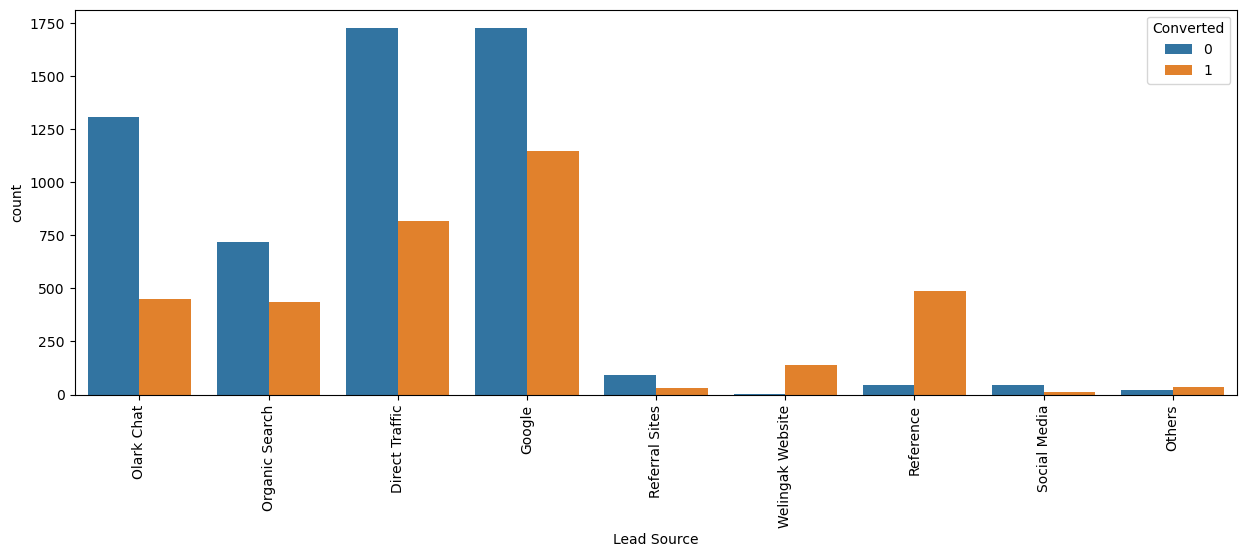

In [39]:
# Visualization

plt.figure(figsize=(15, 5))
s6 = sns.countplot(x='Lead Source', hue='Converted', data=data)
s6.set_xticklabels(s6.get_xticklabels(), rotation=90)

plt.show()

#### From the above graph, we can see that while Google and Direct traffic have the most leads, the conversion rate is low. So focus must be on improving lead conversion in both these areas. The company must also focus on improving lead conversions in both Olark Chart and Organic Search. References yeild a good number of leads.

#### "Last Activity"

In [40]:
data['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

#### From the above list, we can see that there are a number of values having low freq. So we can group them under a single name.

In [41]:
data['Last Activity'] = data['Last Activity'].replace(np.nan,'Others')

data['Last Activity'] = data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

data['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: count, dtype: int64

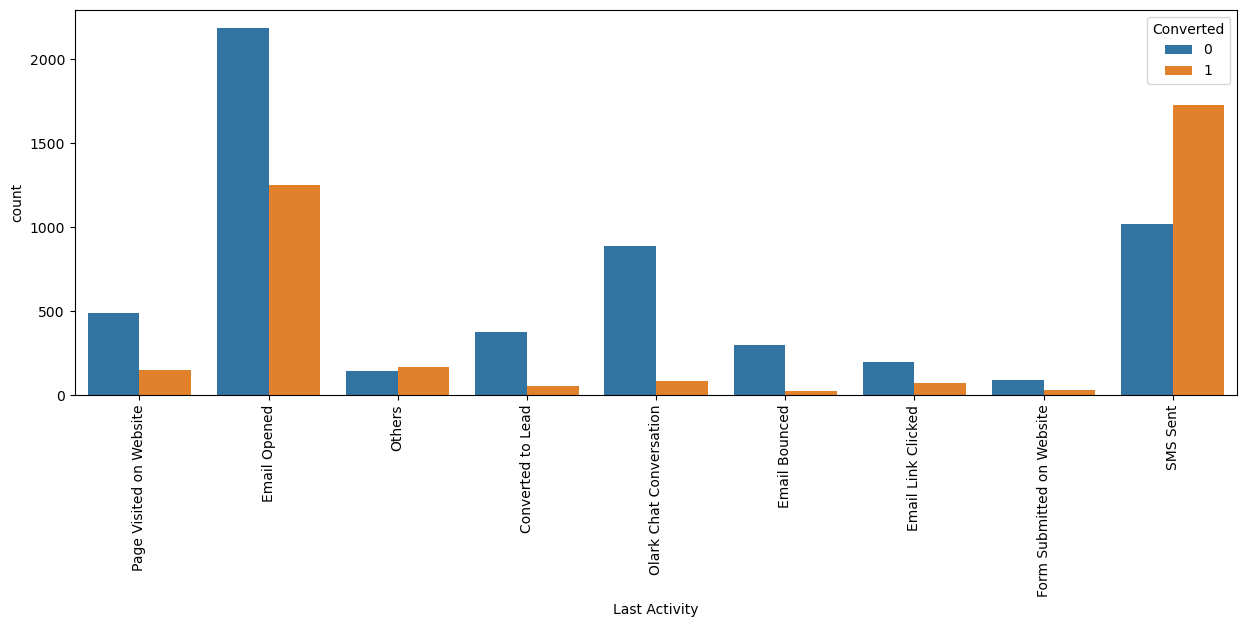

In [42]:
# Visualization

plt.figure(figsize=(15, 5))
s7 = sns.countplot(x='Last Activity', hue='Converted', data=data)
s7.set_xticklabels(s7.get_xticklabels(), rotation=90)

plt.show()

#### "Last Notable Activity"

In [43]:
data['Last Notable Activity'].value_counts(dropna=False)

Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

#### We can group the low frequency values as a single value from "Email Bounced"

In [44]:
data['Last Notable Activity'] = data['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

data['Last Notable Activity'].value_counts(dropna=False)

Last Notable Activity
Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: count, dtype: int64

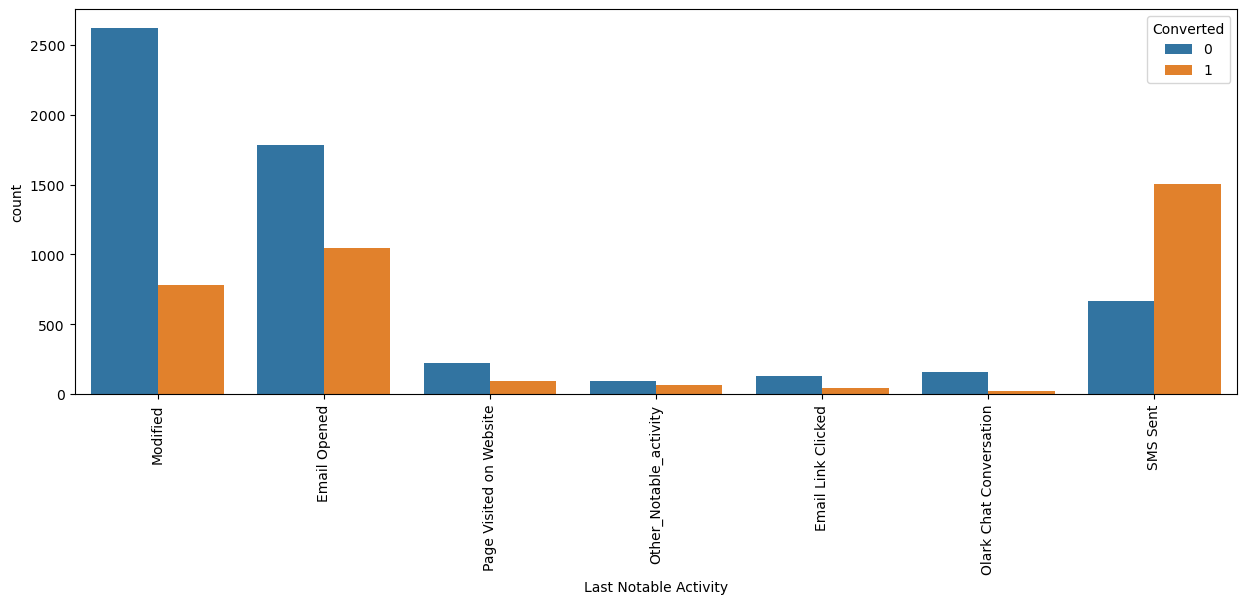

In [45]:
# Visualization

plt.figure(figsize=(15, 5))
s8 = sns.countplot(x='Last Notable Activity', hue='Converted', data=data)
s8.set_xticklabels(s8.get_xticklabels(), rotation=90)

plt.show()

In [46]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                                        0.00
Update me on Supply 

#### From the above list we can see that only 2 columns are having null values(>2% of the total data). So we can drop these values which will not affect the overall analysis.

In [47]:
data = data.dropna()

round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

#### There are no null values present. We can move forward with the analysis.

#### "Lead Origin"

In [48]:
data['Lead Origin'].value_counts(dropna=False)

Lead Origin
Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: count, dtype: int64

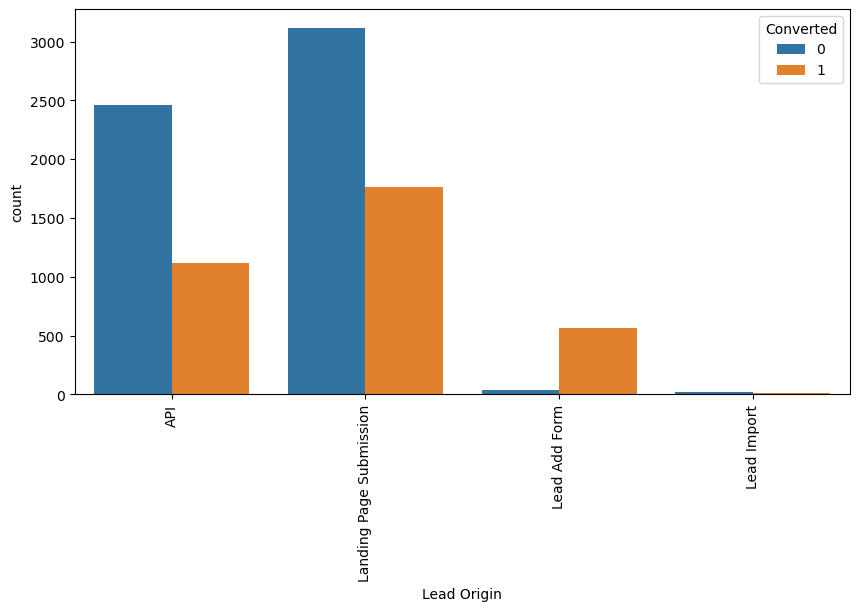

In [49]:
# Visualization

plt.figure(figsize=(10, 5))
s9 = sns.countplot(x='Lead Origin', hue='Converted', data=data)
s9.set_xticklabels(s9.get_xticklabels(), rotation=90)

plt.show()

#### From the graph, we can see that both API and Landing Page Submission (LPS) bring most of the leads and also have a significant lead conversion rate. While the lead conversion rate for Lead Add Form (LAF) is very high, the total no of leads are low. So the organization must focus on the LAF to bring in more leads.

#### "Do not Email" and "Do not Call"

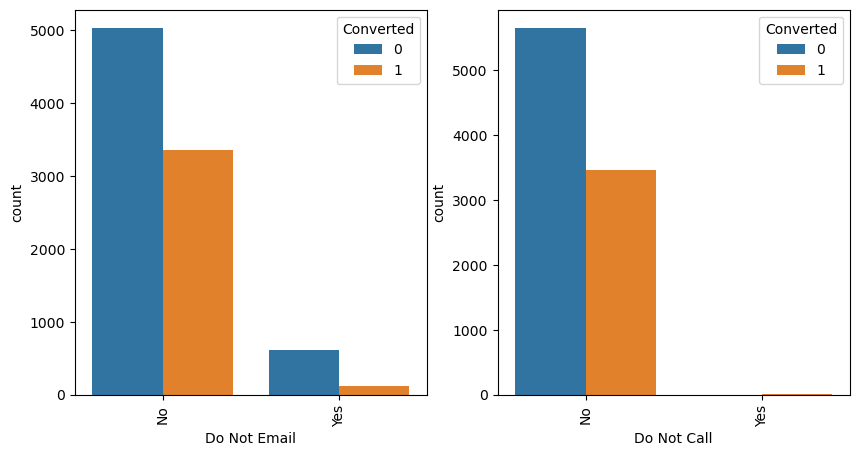

In [50]:
# Converting from int to str

data['Do Not Email'] = data['Do Not Email'].astype(str)
data['Do Not Call'] = data['Do Not Call'].astype(str)

plt.figure(figsize=(10, 5))

axp1 = plt.subplot(1, 2, 1)
axp1 = sns.countplot(x='Do Not Email', hue='Converted', data=data)
axp1.set_xticklabels(axp1.get_xticklabels(), rotation=90)

axp2 = plt.subplot(1, 2, 2)
axp2 = sns.countplot(x='Do Not Call', hue='Converted', data=data)
axp2.set_xticklabels(axp2.get_xticklabels(), rotation=90)

plt.show()

In [51]:
# Checking value counts

data['Do Not Email'].value_counts(dropna=False)

Do Not Email
No     8379
Yes     724
Name: count, dtype: int64

In [52]:
data['Do Not Call'].value_counts(dropna=False)

Do Not Call
No     9101
Yes       2
Name: count, dtype: int64

#### We will drop the Do Not Call column since the count is very biased towards 'No'.

In [53]:
data.drop(['Do Not Call'], axis = 1, inplace = True)

data.shape

(9103, 25)

#### Just by looking at the data, we can see that some of the columns are heavily imbalanced. So instead of dropping them one by one, we use a loop to drop the columns with a imbalance of data greater than or equal to 95% of the original data.

In [54]:
threshold = 0.95

columns_to_drop = []

for column in data.columns:
    # Percentage of the most frequent value
    most_freq_val_perc = data[column].value_counts(normalize=True).max()
    if most_freq_val_perc > threshold:
        columns_to_drop.append(column)

data.drop(columns=columns_to_drop, inplace=True)

print("Columns to drop:", columns_to_drop)

Columns to drop: ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [55]:
data.shape

(9103, 14)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   object 
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   object 
 

#### The above list shows the remaining columns of the Dataset

### Numerical Variable Analysis

#### We now check the % of data having Converted = 1

In [57]:
data['Converted'] = data['Converted'].astype('float64')
data['Total Time Spent on Website'] = data['Total Time Spent on Website'].astype('float64')

Conv_perc = (sum(data['Converted'])/len(data['Converted'].index))*100
Conv_perc

38.02043282434362

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   float64
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   float64
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   object 
 

#### Plotting Correlation map of the numerical variables

In [59]:
numeric_data = data.select_dtypes(include=[np.number])

corr_matrix = numeric_data.corr()

corr_matrix

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.030395,0.354939,-0.003328
TotalVisits,0.030395,1.000000,0.221240,0.512125
Total Time Spent on Website,0.354939,0.221240,1.000000,0.320361
Page Views Per Visit,-0.003328,0.512125,0.320361,1.000000


#### We will now visualize the numerical variables (barring Converted) to better understand these variables

#### "Total Time Spent on Website	"

In [60]:
data['Total Time Spent on Website'].describe()
#(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
25%         9.000000
50%       244.000000
75%       919.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

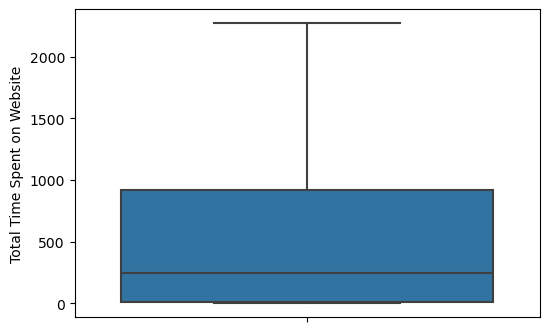

In [61]:
plt.figure(figsize=(6,4))
sns.boxplot(y=data['Total Time Spent on Website'])
plt.show()

#### From the above boxplot, we can see that there are no major outliers. Therefore we can leave it as it is.

#### "Page Views Per Visit"

In [62]:
data['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

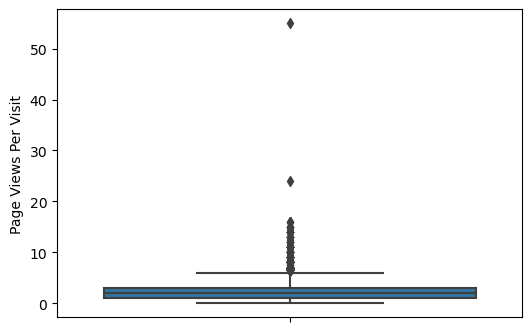

In [63]:
plt.figure(figsize=(6,4))
sns.boxplot(y=data['Page Views Per Visit'])
plt.show()

#### There are some outlieres present in the "Page Views Per Visit" which are extremely skewed at the extreme ends. To solve this, we can remove the top and bottom 1% of the data to correct this.

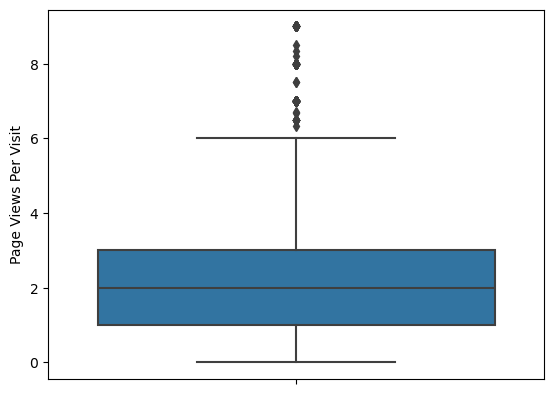

In [64]:
# Quartile removal

Q3 = data['Page Views Per Visit'].quantile(0.99)
data = data[data['Page Views Per Visit'] <= Q3]
Q1 = data['Page Views Per Visit'].quantile(0.01)
data = data[data['Page Views Per Visit'] >= Q1]
sns.boxplot(y=data['Page Views Per Visit'])
plt.show()


#### "Total Visits"

In [65]:
data['TotalVisits'].describe()

count    9028.000000
mean        3.355560
std         4.695546
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

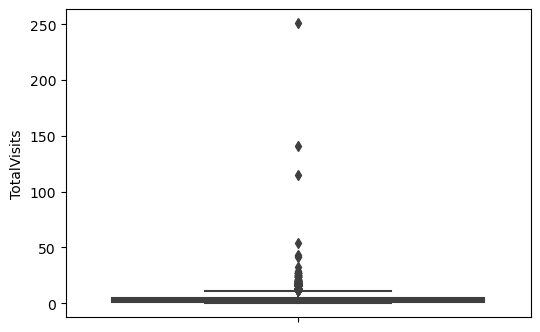

In [66]:
plt.figure(figsize=(6,4))
sns.boxplot(y=data['TotalVisits'])
plt.show()

#### Similar to the previous variable, "TotalVisits" also has outliers which are skewed. So we can follow the same method as before to remove the outliers

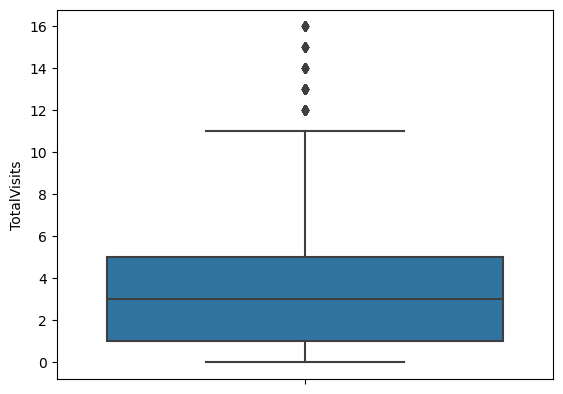

In [67]:
Q3 = data['TotalVisits'].quantile(0.99)
data = data[data['TotalVisits'] <= Q3]
Q1 = data['TotalVisits'].quantile(0.01)
data = data[data['TotalVisits'] >= Q1]
sns.boxplot(y=data['TotalVisits'])
plt.show()

#### Now that the outliers are taken care of, we can move with the analysis

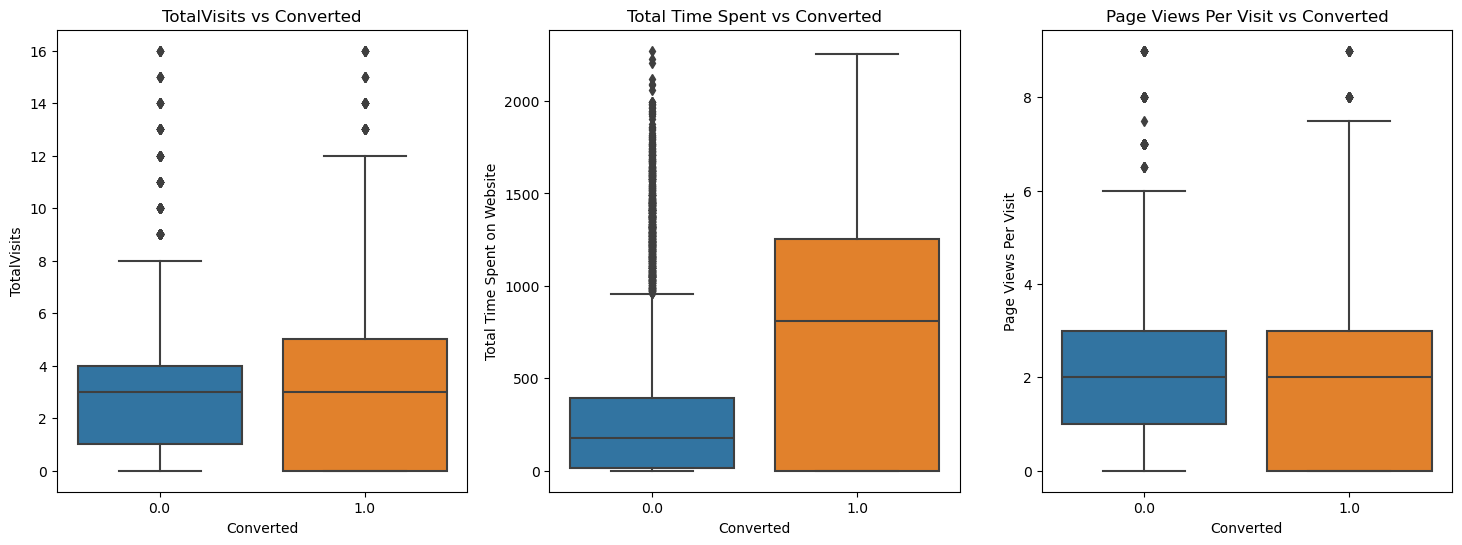

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Plotting each boxplot individually
sns.boxplot(x='Converted', y='TotalVisits', data=data, ax=axes[0])
axes[0].set_title('TotalVisits vs Converted')

sns.boxplot(x='Converted', y='Total Time Spent on Website', data=data, ax=axes[1])
axes[1].set_title('Total Time Spent vs Converted')

sns.boxplot(x='Converted', y='Page Views Per Visit', data=data, ax=axes[2])
axes[2].set_title('Page Views Per Visit vs Converted')

# Show plot
plt.show()

#### From the above plots, we can see that:
- The median for converted and not converted leads is the same in the "Total Visits" and "Page Views Per Visit" column. Therefore no conclusion can be drawn from this

- The lead conversion in the "Total Time Spent on Website" is high, and therefore the organization must focus on improving their website to attract more customers

#### With this, the data analysis is done. We can now proceed with the dummy variable creation and build out Logistic Regression Model

### Dummy Variable Creation for Categorical Variables

In [69]:
cat_cols= data.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### From the categorical column list, we can see that only the columns "A free copy of Mastering The Interview" and "Do Not Email" are having 2 values (yes and no). So we can map it directly to 0 and 1. We can create dummy variables for the rest of the categorical  columns. We create the dummy variables, drop the original columns and add/concatenate the variables to the data frame.

In [70]:
col_list =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list

data[col_list] = data[col_list].apply(binary_map)

In [71]:
dummy = pd.get_dummies(data[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

data = pd.concat([data,dummy],axis = 1)

In [72]:
dummy = pd.get_dummies(data['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], axis = 1)
data = pd.concat([data, dummy], axis = 1)

In [73]:
dummy = pd.get_dummies(data['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], axis = 1)
data = pd.concat([data, dummy], axis = 1)

In [74]:
dummy = pd.get_dummies(data['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], axis = 1)
data = pd.concat([data, dummy], axis = 1)

In [75]:
dummy = pd.get_dummies(data['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], axis = 1)
data = pd.concat([data, dummy], axis = 1)

In [76]:
dummy = pd.get_dummies(data['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], axis = 1)
data = pd.concat([data, dummy], axis = 1)

In [77]:
#dropping the original columns after dummy variable creation

data.drop(cat_cols,axis = 1,inplace = True)

In [78]:
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,0.0,5.0,674.0,2.5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1.0,2.0,1532.0,2.0,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,0.0,1.0,305.0,1.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,1.0,2.0,1428.0,1.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [79]:
from sklearn.model_selection import train_test_split

# Splitting into X and y

y = data['Converted']

y.head()

X=data.drop('Converted', axis=1)

#### We split the dataset in a ratio of 7:3

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [81]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6255 entries, 6133 to 5834
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6255 non-null   float64
 1   Total Time Spent on Website                           6255 non-null   float64
 2   Page Views Per Visit                                  6255 non-null   float64
 3   Lead Origin_Landing Page Submission                   6255 non-null   bool   
 4   Lead Origin_Lead Add Form                             6255 non-null   bool   
 5   Lead Origin_Lead Import                               6255 non-null   bool   
 6   What is your current occupation_Housewife             6255 non-null   bool   
 7   What is your current occupation_Other                 6255 non-null   bool   
 8   What is your current occupation_Student               6255 n

### DATA SCALING (For Train Data)

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
6133,-1.090558,-0.878295,-1.200753,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6681,-0.740363,-0.361568,-0.666032,True,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
6869,-1.090558,-0.878295,-1.200753,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1012,-0.390169,-0.528907,-0.131311,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5615,-0.390169,-0.863584,-0.131311,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


### Model Building

In [83]:
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator=log_reg, n_features_to_select=15)            # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
# To check which features were selected

rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False,  True,  True, False,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True])

In [85]:
# To get the selected features and its rankings

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 33),
 ('What is your current occupation_Housewife', False, 28),
 ('What is your current occupation_Other', False, 40),
 ('What is your current occupation_Student', False, 18),
 ('What is your current occupation_Unemployed', False, 17),
 ('What is your current occupation_Working Professional', False, 7),
 ('City_Other Cities', False, 32),
 ('City_Other Cities of Maharashtra', False, 34),
 ('City_Other Metro Cities', False, 37),
 ('City_Thane & Outskirts', False, 38),
 ('City_Tier II Cities', False, 30),
 ('Specialization_Banking, Investment And Insurance', False, 19),
 ('Specialization_Business Administration', False, 31),
 ('Specialization_E-Business', False, 29),
 ('Specialization_E-COMMERCE', False, 20),
 ('Specialization_International Business', F

In [86]:
#RFE supported columns

col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off'],
      dtype='object')

In [87]:
# RFE not-supported columns

X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specialization',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source

#### Now that we got the list of supported columns using RFE, we will now start with building the model.

#### Since some of the datatypes of featues are not in the correct format, we first convert it from 'bool' to 'uint8'. This is to make sure that the model is able to read the features without any trouble.

In [88]:
bool_cols = X_train.select_dtypes(include=['bool']).columns

X_train[bool_cols] = X_train[bool_cols].astype('uint8')

#### MODEL - 1

In [89]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6255
Model:                            GLM   Df Residuals:                     6239
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1230.4
Date:                Sat, 15 Jun 2024   Deviance:                       2460.8
Time:                        12:00:22   Pearson chi2:                 1.13e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6054
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.1921      0.084    -14.250      0.000      -1.356      -1.028
Total Time Spent on Website                  0.8922      0.053     16.939      0.000       0.789       0.995
Lead Origin_Lead Add Form                    1.6869      0.443      3.811      0.000       0.819       2.554
Lead Source_Direct Traffic                  -0.5803      0.127     -4.578      0.000      -0.829      -0.332
Lead Source_Welingak Website                 3.2247      0.855      3.772      0.000       1.549       4.900
Last Activity_Email Bounced                 -1.1169      0.474     -2.355      0.019      -2.046      -0.187
Last Activity_SMS Sent                       1.9987      0.115     17.317      0.000       1.773       2.225
Last Notable Activity_Email Link Clicked    -1.3032      0.494     -2.636      0.008      -2.272      -0.334
Last Notable Activity_Modified              -1.5955      0.126    -12.697      0.000      -1.842      -1.349
Tags_Closed by Horizzon                      7.1132      1.020      6.974      0.000       5.114       9.112
Tags_Interested in other courses            -1.7767      0.349     -5.093      0.000      -2.460      -1.093
Tags_Lost to EINS                            6.3815      0.736      8.669      0.000       4.939       7.824
Tags_Other_Tags                             -2.0763      0.227     -9.135      0.000      -2.522      -1.631
Tags_Ringing                                -3.5798      0.250    -14.322      0.000      -4.070      -3.090
Tags_Will revert after reading the email     4.6075      0.199     23.164      0.000       4.218       4.997
Tags_switched off                           -4.3273      0.731     -5.920      0.000      -5.760      -2.895
============================================================================================================
"""

#### We will now drop the features which are having a high p-value since features having a high p-value usually do not contribute much to the model. Since "Last Activity_Email Bounced" has a high p-value, we will be dropping it.

In [90]:
col = col.drop('Last Activity_Email Bounced',1)

#### MODEL - 2

In [91]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6255
Model:                            GLM   Df Residuals:                     6240
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1233.7
Date:                Sat, 15 Jun 2024   Deviance:                       2467.5
Time:                        12:00:22   Pearson chi2:                 1.15e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6049
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.2114      0.084    -14.501      0.000      -1.375      -1.048
Total Time Spent on Website                  0.8891      0.053     16.920      0.000       0.786       0.992
Lead Origin_Lead Add Form                    1.6863      0.442      3.813      0.000       0.819       2.553
Lead Source_Direct Traffic                  -0.5967      0.126     -4.724      0.000      -0.844      -0.349
Lead Source_Welingak Website                 3.1924      0.854      3.740      0.000       1.519       4.865
Last Activity_SMS Sent                       2.0325      0.115     17.671      0.000       1.807       2.258
Last Notable Activity_Email Link Clicked    -1.2822      0.494     -2.593      0.010      -2.251      -0.313
Last Notable Activity_Modified              -1.6267      0.125    -13.019      0.000      -1.872      -1.382
Tags_Closed by Horizzon                      7.1422      1.020      7.000      0.000       5.142       9.142
Tags_Interested in other courses            -1.7880      0.350     -5.107      0.000      -2.474      -1.102
Tags_Lost to EINS                            6.3560      0.733      8.672      0.000       4.919       7.792
Tags_Other_Tags                             -2.0845      0.227     -9.188      0.000      -2.529      -1.640
Tags_Ringing                                -3.5810      0.250    -14.316      0.000      -4.071      -3.091
Tags_Will revert after reading the email     4.6152      0.198     23.274      0.000       4.227       5.004
Tags_switched off                           -4.3289      0.731     -5.921      0.000      -5.762      -2.896
============================================================================================================
"""

#### From the above table, we can see that the p-values for all the features are 0. So we can move with the next step of the analysis : To check the Variance Inflation Factor (VIF) to identify correlation between the remaining features

#### We will now create a Data Frame to store the features and its respective VIF scores

In [92]:
df_vif = pd.DataFrame()

# Calculate VIF score
df_vif['Features'] = X_train[col].columns
df_vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]

# Rounding off and rearranging the VIF scores
df_vif['VIF'] = round(df_vif['VIF'], 2)
df_vif = df_vif.sort_values(by = "VIF", ascending = False)

df_vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.81
12,Tags_Will revert after reading the email,1.55
4,Last Activity_SMS Sent,1.49
6,Last Notable Activity_Modified,1.41
2,Lead Source_Direct Traffic,1.39
3,Lead Source_Welingak Website,1.34
0,Total Time Spent on Website,1.23
7,Tags_Closed by Horizzon,1.21
10,Tags_Other_Tags,1.21
11,Tags_Ringing,1.17


#### From the above table, we can see that there are no abnormal scores, indicating low multicollinearity between the features. We can now move forward with calculating probabilities on the Train Data.

In [93]:
# Getting Predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6133    0.026109
6681    0.002898
6869    0.120015
1012    0.092930
5615    0.020672
8257    0.986161
4689    0.040524
6282    0.048653
2949    0.000504
5140    0.003389
dtype: float64

#### Predicting Train Data with Prospect ID

In [94]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
6133,0.0,0.026109,6133
6681,0.0,0.002898,6681
6869,0.0,0.120015,6869
1012,0.0,0.092930,1012
5615,0.0,0.020672,5615


In [95]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head

y_train_pred_final.head(10)

,Converted,Converted_prob,Prospect ID,Predicted
6133,0.0,0.026109,6133,0
6681,0.0,0.002898,6681,0
6869,0.0,0.120015,6869,0
1012,0.0,0.092930,1012,0
5615,0.0,0.020672,5615,0
8257,1.0,0.986161,8257,1
4689,0.0,0.040524,4689,0
6282,0.0,0.048653,6282,0
2949,0.0,0.000504,2949,0
5140,0.0,0.003389,5140,0


#### Now that we have the predicted values of the Train Set, we will now calculate the overall accuracy.

In [96]:
from sklearn import metrics

# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3727  182]
 [ 278 2068]]


In [97]:
# Overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.926458832933653


#### We have an accuracy of over 90% for the Train Dataset.

In [98]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

Sensitivity (True Positive Rate): 0.8815004262574595
Specificity (True Negative Rate): 0.9534407776925045


#### We will now plot an ROC curve and try to find the optimal cut-off point

In [99]:
# Function to plot ROC Curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    
    # Area Under Curve (AUC score)
    auc_score = metrics.roc_auc_score( actual, probs )

    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')

    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")

    plt.show()

    return None

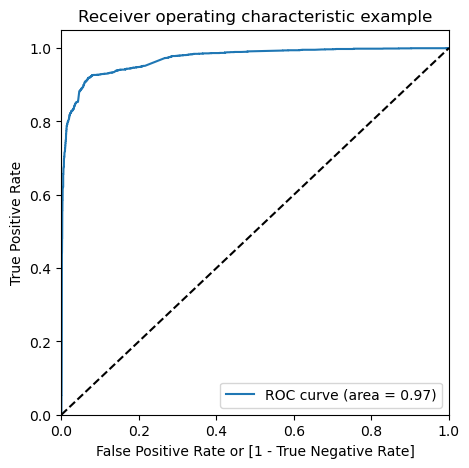

In [100]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### From the above graph, we can see that the Area is very close(0.97), indicating a good predictive model. We will now try to find the optimal cutoff point. We will first create columns with different cut-offs (from 0.1 to 0.9). We will then calculate the accuracy, specificity and sensitivity of these cut-off, and plot these in a graph to find the optimal cut-off point.

In [101]:
# Creating different cut-off points 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
6133,0.0,0.026109,6133,0,1,0,0,0,0,0,0,0,0,0
6681,0.0,0.002898,6681,0,1,0,0,0,0,0,0,0,0,0
6869,0.0,0.120015,6869,0,1,1,0,0,0,0,0,0,0,0
1012,0.0,0.092930,1012,0,1,0,0,0,0,0,0,0,0,0
5615,0.0,0.020672,5615,0,1,0,0,0,0,0,0,0,0,0


#### We will calculate the accuracy and other metrics of the different cut-off points.

In [102]:
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity']) #Probability, Accuracy, Sensitivity, Specificity

from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.375060     1.000000     0.000000
0.1          0.1  0.813110     0.978261     0.713993
0.2          0.2  0.908074     0.929241     0.895370
0.3          0.3  0.925659     0.917306     0.930673
0.4          0.4  0.926299     0.901108     0.941417
0.5          0.5  0.926459     0.881500     0.953441
0.6          0.6  0.918465     0.829497     0.971860
0.7          0.7  0.916707     0.811594     0.979790
0.8          0.8  0.908713     0.778772     0.986697
0.9          0.9  0.889848     0.721654     0.990790


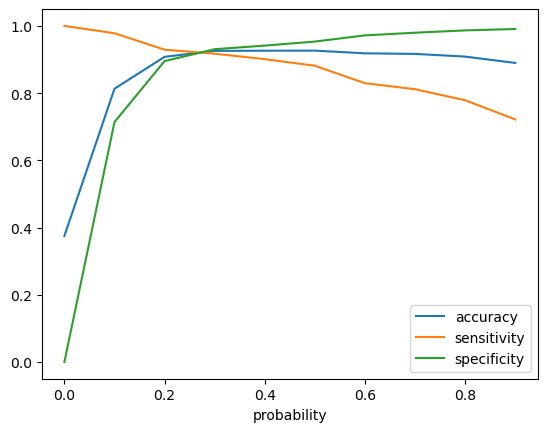

In [103]:
# Plotting the metrics

cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

#### We can see that 0.3 is the most optimal cut-off point from the above plot having an accuracy of 0.9256. We will now calculate the predictions based on the new cut-off point.

In [104]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head(10)

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
6133,0.0,0.026109,6133,0,1,0,0,0,0,0,0,0,0,0,0
6681,0.0,0.002898,6681,0,1,0,0,0,0,0,0,0,0,0,0
6869,0.0,0.120015,6869,0,1,1,0,0,0,0,0,0,0,0,0
1012,0.0,0.092930,1012,0,1,0,0,0,0,0,0,0,0,0,0
5615,0.0,0.020672,5615,0,1,0,0,0,0,0,0,0,0,0,0
8257,1.0,0.986161,8257,1,1,1,1,1,1,1,1,1,1,1,1
4689,0.0,0.040524,4689,0,1,0,0,0,0,0,0,0,0,0,0
6282,0.0,0.048653,6282,0,1,0,0,0,0,0,0,0,0,0,0
2949,0.0,0.000504,2949,0,1,0,0,0,0,0,0,0,0,0,0
5140,0.0,0.003389,5140,0,1,0,0,0,0,0,0,0,0,0,0


In [105]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head(10)

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
6133,0.0,0.026109,6133,0,3
6681,0.0,0.002898,6681,0,0
6869,0.0,0.120015,6869,0,12
1012,0.0,0.092930,1012,0,9
5615,0.0,0.020672,5615,0,2
8257,1.0,0.986161,8257,1,99
4689,0.0,0.040524,4689,0,4
6282,0.0,0.048653,6282,0,5
2949,0.0,0.000504,2949,0,0
5140,0.0,0.003389,5140,0,0


### Observations
- Accuracy : 0.925659
- Sensitivity : 0.917306
- Specificity : 0.930673

- ROC curve (Area) : 0.97

#### From the above values, we can see that the model is performing well. We will now move forward with the test set analysis.

### DATA SCALING (For Test Set)

In [106]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
2512,0.662739,0.206135,1.382497,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
4013,-1.107293,-0.875502,-1.184194,False,True,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
7788,-0.753286,-0.305351,-0.670856,True,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4938,-0.399280,-0.818670,-0.157517,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
8949,1.016745,-0.580343,-0.414186,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False


In [107]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
2512,0.206135,False,False,False,True,False,False,False,False,False,False,False,True,False
4013,-0.875502,True,False,True,True,False,False,False,False,False,False,False,False,False
7788,-0.305351,False,True,False,False,False,True,False,False,False,True,False,False,False
4938,-0.818670,False,False,False,True,False,False,False,False,False,False,False,False,False
8949,-0.580343,False,False,False,False,False,False,False,False,False,False,False,True,False


In [108]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2682 entries, 2512 to 2201
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Total Time Spent on Website               2682 non-null   float64
 1   Lead Origin_Lead Add Form                 2682 non-null   bool   
 2   Lead Source_Direct Traffic                2682 non-null   bool   
 3   Lead Source_Welingak Website              2682 non-null   bool   
 4   Last Activity_SMS Sent                    2682 non-null   bool   
 5   Last Notable Activity_Email Link Clicked  2682 non-null   bool   
 6   Last Notable Activity_Modified            2682 non-null   bool   
 7   Tags_Closed by Horizzon                   2682 non-null   bool   
 8   Tags_Interested in other courses          2682 non-null   bool   
 9   Tags_Lost to EINS                         2682 non-null   bool   
 10  Tags_Other_Tags                       

In [109]:
bool_cols = X_test.select_dtypes(include=['bool']).columns

X_test[bool_cols] = X_test[bool_cols].astype('uint8')

In [110]:
X_test_sm = sm.add_constant(X_test)

#### Test Set Predictions

In [111]:
y_test_pred = res.predict(X_test_sm)

In [112]:
y_test_pred[:10]

2512    0.996387
4013    0.992764
7788    0.003046
4938    0.523288
8949    0.947243
3755    0.146182
6236    0.120277
5845    0.086552
3342    0.133073
8152    0.006221
dtype: float64

In [113]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
2512,0.996387
4013,0.992764
7788,0.003046
4938,0.523288
8949,0.947243


In [114]:
# Converting to a Data Frame

y_test_df = pd.DataFrame(y_test)

# Adding Prospect ID
y_test_df['Prospect ID'] = y_test_df.index

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [115]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,2512,1.0,0.996387,100
1,4013,1.0,0.992764,99
2,7788,0.0,0.003046,0
3,4938,0.0,0.523288,52
4,8949,1.0,0.947243,95


In [116]:
# Applying the cut-off point

y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,2512,1.0,0.996387,100,1
1,4013,1.0,0.992764,99,1
2,7788,0.0,0.003046,0,0
3,4938,0.0,0.523288,52,1
4,8949,1.0,0.947243,95,1


In [117]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9258016405667412

In [118]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
print(confusion2)

[[1515  120]
 [  79  968]]


In [119]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

Sensitivity (True Positive Rate): 0.9245463228271251
Specificity (True Negative Rate): 0.926605504587156


### Observations

- Accuracy : 0.9258
- Sensitivity : 0.9245
- Specificity : 0.9266

## We can see that the model is able to predict the conversion rate with an accuracy of over 90 %. 